# Dự đoán xu hướng điểm trung vị của khối A, B, C, D,...

### B1: chuẩn bị dữ liệu và các thông số để dự đoán

In [1]:
import pandas as pd
import numpy as np

# Đọc dữ liệu từ các file
file_paths = {
    "2019": r'..\Data\diem_thi_2019.csv',
    "2020": r'..\Data\diem_thi_2020.csv',
    "2021": r'..\Data\diem_thi_2021.csv',
    "2022": r'..\Data\diem_thi_2022.csv',
    "2023": r'..\Data\diem_thi_2023.csv',
    "2024": r'..\Data\diem_thi_2024.csv'
}

# Lưu kết quả trung bình theo năm
average_scores = []

for year, path in file_paths.items():
    # Đọc dữ liệu từng năm
    df = pd.read_csv(path)
    
    # Kiểm tra các cột cần thiết
    required_columns = ['Toán', 'Lý', 'Hóa', 'Văn', 'Sử', 'Địa', 'Ngoại Ngữ', 'Sinh']
    

    # Tính điểm các khối
    df['Khối A'] = df['Toán'] + df['Lý'] + df['Hoá']
    df['Khối B'] = df['Toán'] + df['Hoá'] + df['Sinh']
    df['Khối C'] = df['Văn'] + df['Sử'] + df['Địa']
    df['Khối D'] = df['Toán'] + df['Văn'] + df['Ngoại Ngữ']

    # Tính trung bình điểm từng khối
    averages = {
        'Năm': year,
        'Trung bình Khối A': df['Khối A'].mean(),
        'Trung bình Khối B': df['Khối B'].mean(),
        'Trung bình Khối C': df['Khối C'].mean(),
        'Trung bình Khối D': df['Khối D'].mean()
    }
    average_scores.append(averages)

# Chuyển kết quả sang DataFrame và in ra
result_df = pd.DataFrame(average_scores)



### B2: huấn luyện mô hình và dự báo

In [2]:
from sklearn.linear_model import LinearRegression
years = np.array([2019, 2020, 2021, 2022, 2023, 2024]).reshape(-1, 1)
scores_A = result_df['Trung bình Khối A']
scores_B = result_df['Trung bình Khối B']
scores_C = result_df['Trung bình Khối C']
scores_D = result_df['Trung bình Khối D']

# Dự báo cho từng khối
model_A = LinearRegression().fit(years, scores_A)
model_B = LinearRegression().fit(years, scores_B)
model_C = LinearRegression().fit(years, scores_C)
model_D = LinearRegression().fit(years, scores_D)

# Dự báo năm 2025
year_2025 = np.array([[2025]])
predicted_A = model_A.predict(year_2025)[0]
predicted_B = model_B.predict(year_2025)[0]
predicted_C = model_C.predict(year_2025)[0]
predicted_D = model_D.predict(year_2025)[0]

### B3: vẽ biểu đồ thể hiện dự báo

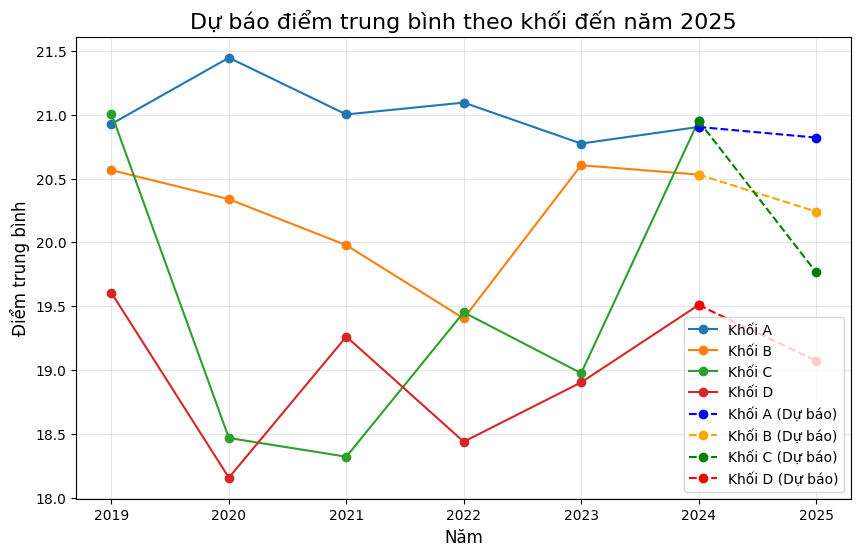

In [3]:
import matplotlib.pyplot as plt

# Chuẩn bị dữ liệu hiện tại và dự báo
years_full = np.append(years.flatten(), 2025)
scores_A_full = np.append(scores_A, predicted_A)
scores_B_full = np.append(scores_B, predicted_B)
scores_C_full = np.append(scores_C, predicted_C)
scores_D_full = np.append(scores_D, predicted_D)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))

# Biểu đồ đường cho từng khối
plt.plot(years, scores_A, label="Khối A", marker='o', linestyle='-')
plt.plot(years, scores_B, label="Khối B", marker='o', linestyle='-')
plt.plot(years, scores_C, label="Khối C", marker='o', linestyle='-')
plt.plot(years, scores_D, label="Khối D", marker='o', linestyle='-')

# Nét đứt cho dự báo
plt.plot([2024, 2025], [scores_A.iloc[-1], predicted_A], label="Khối A (Dự báo)", marker='o', linestyle='--', color='blue')
plt.plot([2024, 2025], [scores_B.iloc[-1], predicted_B], label="Khối B (Dự báo)", marker='o', linestyle='--', color='orange')
plt.plot([2024, 2025], [scores_C.iloc[-1], predicted_C], label="Khối C (Dự báo)", marker='o', linestyle='--', color='green')
plt.plot([2024, 2025], [scores_D.iloc[-1], predicted_D], label="Khối D (Dự báo)", marker='o', linestyle='--', color='red')


# Tùy chỉnh biểu đồ
plt.title("Dự báo điểm trung bình theo khối đến năm 2025", fontsize=16)
plt.xlabel("Năm", fontsize=12)
plt.ylabel("Điểm trung bình", fontsize=12)
plt.xticks(years_full)  # Hiển thị tất cả các năm
plt.legend()
plt.grid(alpha=0.3)

# Hiển thị biểu đồ
plt.show()
